In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 4.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_excel('/kaggle/input/tfidflr/nhsdatanew.xlsx',sheet_name='Sheet3')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24009 entries, 0 to 24008
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Diseases  24009 non-null  object
 1   Sym_1     24009 non-null  object
 2   Sym_2     24009 non-null  object
 3   Sym_3     24009 non-null  object
 4   Sym_5     24009 non-null  object
 5   Sym_6     20943 non-null  object
 6   Sym_7     24009 non-null  object
 7   Directed  24009 non-null  object
dtypes: object(8)
memory usage: 1.5+ MB


In [5]:
#df=pd.read_excel('dataset-19.xlsx',sheet_name='Datanew')
df.shape[1]

8

In [6]:
X=df.drop(columns=['Directed'])
y=df['Directed']
df

,Diseases,Sym_1,Sym_2,Sym_3,Sym_5,Sym_6,Sym_7,Directed
0,Book a gp appointment or get health advice,finger pain,less than 24 hours,no,none,none,doing regular activities,pharmacy
1,Book a gp appointment or get health advice,finger pain,longer than 24 hours,no,none,none,doing regular activities,pharmacy
2,Book a gp appointment or get health advice,finger pain,long term or intermittent,no,none,none,doing regular activities,pharmacy
3,Book a gp appointment or get health advice,finger pain,less than 24 hours,paracetamol,none,none,doing regular activities,pharmacy
4,Book a gp appointment or get health advice,wrist pain my wrists hurt,longer than 24 hours,paracetamol,none,none,doing regular activities,physio
...,...,...,...,...,...,...,...,...
24004,Book a gp appointment or get health advice,finger pain my finger hurts,longer than 24 hours,aspirin or any other medication,painful lump,long lasting fever,unable to move affected area,gp
24005,Book a gp appointment or get health advice,finger pain my finger hurts,long term or intermittent,aspirin or any other medication,painful lump,long lasting fever,unable to move affected area,gp
24006,Book a gp appointment or get health advice,finger pain my finger hurts,less than 24 hours,any creams or gels,painful lump,long lasting fever,unable to move affected area,gp
24007,Book a gp appointment or get health advice,finger pain my finger hurts,longer than 24 hours,any creams or gels,painful lump,long lasting fever,unable to move affected area,gp


<AxesSubplot:>

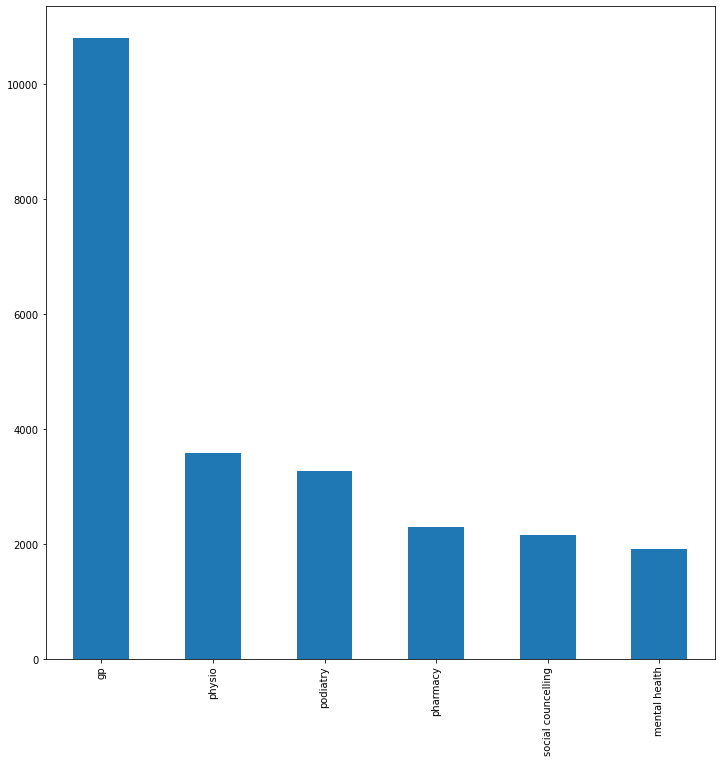

In [7]:
plt.figure(figsize=(12,12))
df.Directed.value_counts().plot(kind='bar')

In [8]:
#Renaming col names
list1=[i for i in range(df.shape[1])]
new_Index=[str(i) for i in list1]
df.columns=new_Index
df.head()


,0,1,2,3,4,5,6,7
0,Book a gp appointment or get health advice,finger pain,less than 24 hours,no,none,none,doing regular activities,pharmacy
1,Book a gp appointment or get health advice,finger pain,longer than 24 hours,no,none,none,doing regular activities,pharmacy
2,Book a gp appointment or get health advice,finger pain,long term or intermittent,no,none,none,doing regular activities,pharmacy
3,Book a gp appointment or get health advice,finger pain,less than 24 hours,paracetamol,none,none,doing regular activities,pharmacy
4,Book a gp appointment or get health advice,wrist pain my wrists hurt,longer than 24 hours,paracetamol,none,none,doing regular activities,physio


In [9]:
leng=df.shape[1]
df['Symptoms']=''
symp=[]
for i in range(len(df)) :
    symp.append(' '.join(str(x) for x in df.iloc[i,0:leng-1]))
    
for i in range(len(df)):
    df['Symptoms'][i]=symp[i]
df

,0,1,2,3,4,5,6,7,Symptoms
0,Book a gp appointment or get health advice,finger pain,less than 24 hours,no,none,none,doing regular activities,pharmacy,Book a gp appointment or get health advice fin...
1,Book a gp appointment or get health advice,finger pain,longer than 24 hours,no,none,none,doing regular activities,pharmacy,Book a gp appointment or get health advice fin...
2,Book a gp appointment or get health advice,finger pain,long term or intermittent,no,none,none,doing regular activities,pharmacy,Book a gp appointment or get health advice fin...
3,Book a gp appointment or get health advice,finger pain,less than 24 hours,paracetamol,none,none,doing regular activities,pharmacy,Book a gp appointment or get health advice fin...
4,Book a gp appointment or get health advice,wrist pain my wrists hurt,longer than 24 hours,paracetamol,none,none,doing regular activities,physio,Book a gp appointment or get health advice wri...
...,...,...,...,...,...,...,...,...,...
24004,Book a gp appointment or get health advice,finger pain my finger hurts,longer than 24 hours,aspirin or any other medication,painful lump,long lasting fever,unable to move affected area,gp,Book a gp appointment or get health advice fin...
24005,Book a gp appointment or get health advice,finger pain my finger hurts,long term or intermittent,aspirin or any other medication,painful lump,long lasting fever,unable to move affected area,gp,Book a gp appointment or get health advice fin...
24006,Book a gp appointment or get health advice,finger pain my finger hurts,less than 24 hours,any creams or gels,painful lump,long lasting fever,unable to move affected area,gp,Book a gp appointment or get health advice fin...
24007,Book a gp appointment or get health advice,finger pain my finger hurts,longer than 24 hours,any creams or gels,painful lump,long lasting fever,unable to move affected area,gp,Book a gp appointment or get health advice fin...


In [10]:
df=df[[f'{leng-1}','Symptoms']].copy()
df.head()
#df.iloc[0]
df.Symptoms[0]

'Book a gp appointment or get health advice finger pain less than 24 hours no none none doing regular activities'

In [11]:
data=df.rename({f'{leng-1}':'Department','Symptoms':'Symptoms'},axis=1)
data

,Department,Symptoms
0,pharmacy,Book a gp appointment or get health advice fin...
1,pharmacy,Book a gp appointment or get health advice fin...
2,pharmacy,Book a gp appointment or get health advice fin...
3,pharmacy,Book a gp appointment or get health advice fin...
4,physio,Book a gp appointment or get health advice wri...
...,...,...
24004,gp,Book a gp appointment or get health advice fin...
24005,gp,Book a gp appointment or get health advice fin...
24006,gp,Book a gp appointment or get health advice fin...
24007,gp,Book a gp appointment or get health advice fin...


<AxesSubplot:>

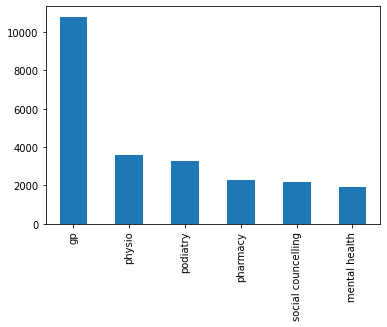

In [12]:
data.Department.value_counts().plot(kind='bar')

## Removing nan and stopwords

In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps=PorterStemmer()
corpus=[]

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = re.sub('nan', '',text)
    text = re.sub('_', ' ',text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
data['Symptoms'] = data['Symptoms'].apply(clean_text)

## Check no. of words 

In [15]:
data['Symptoms'].apply(lambda x: len(x.split(' '))).sum()
data

,Department,Symptoms
0,pharmacy,book gp appointment get health advice finger p...
1,pharmacy,book gp appointment get health advice finger p...
2,pharmacy,book gp appointment get health advice finger p...
3,pharmacy,book gp appointment get health advice finger p...
4,physio,book gp appointment get health advice wrist pa...
...,...,...
24004,gp,book gp appointment get health advice finger p...
24005,gp,book gp appointment get health advice finger p...
24006,gp,book gp appointment get health advice finger p...
24007,gp,book gp appointment get health advice finger p...


In [16]:
data['Symptoms'][0]

'book gp appointment get health advice finger pain less 24 hours none none regular activities'

## Encoding the labels

In [17]:
possible_labels = data.Department.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'pharmacy': 0,
 'physio': 1,
 'gp': 2,
 'podiatry': 3,
 'mental health': 4,
 'social councelling': 5}

In [18]:
data['label'] = data.Department.replace(label_dict)
data

,Department,Symptoms,label
0,pharmacy,book gp appointment get health advice finger p...,0
1,pharmacy,book gp appointment get health advice finger p...,0
2,pharmacy,book gp appointment get health advice finger p...,0
3,pharmacy,book gp appointment get health advice finger p...,0
4,physio,book gp appointment get health advice wrist pa...,1
...,...,...,...
24004,gp,book gp appointment get health advice finger p...,2
24005,gp,book gp appointment get health advice finger p...,2
24006,gp,book gp appointment get health advice finger p...,2
24007,gp,book gp appointment get health advice finger p...,2


## Perform train test split 

In [19]:
# X=data.Symptoms
# y=data.Department
# abc=data.index.values
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(data.index.values, 
#                                                   data.label.values, 
#                                                   test_size=0.15, 
#                                                   random_state=42, 
#                                                   stratify=data.label.values)

# data['data_type'] = ['not_set']*data.shape[0]

# data.loc[X_train, 'data_type'] = 'train'
# data.loc[X_val, 'data_type'] = 'val'

# data.groupby(['Department', 'label', 'data_type']).count()

In [20]:
#abc

In [21]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
#import tensorflow_text as text

## Transform to vector using bert

In [22]:
import numpy as np
seq_len=512
num_samples=len(data)

Xids=np.zeros((num_samples,seq_len))
Xmask=np.zeros((num_samples,seq_len))

Xids.shape

(24009, 512)

In [23]:
from transformers import BertTokenizer

In [24]:
tokenizer= BertTokenizer.from_pretrained('bert-base-cased')

for i,phrase in enumerate(data['Symptoms']):
    tokens=tokenizer.encode_plus(phrase,max_length=seq_len,truncation=True,
                                padding='max_length',add_special_tokens=True,
                                return_tensors='tf')
    Xids[i,:]=tokens['input_ids']
    Xmask[i,:]=tokens['attention_mask']

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

2022-09-22 16:20:35.561180: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-22 16:20:35.661267: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-22 16:20:35.662153: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-22 16:20:35.664654: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [25]:
Xids#

array([[ 101., 1520.,  176., ...,    0.,    0.,    0.],
       [ 101., 1520.,  176., ...,    0.,    0.,    0.],
       [ 101., 1520.,  176., ...,    0.,    0.,    0.],
       ...,
       [ 101., 1520.,  176., ...,    0.,    0.,    0.],
       [ 101., 1520.,  176., ...,    0.,    0.,    0.],
       [ 101., 1520.,  176., ...,    0.,    0.,    0.]])

In [26]:
Xmask#control for the attention layer within bert

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [27]:
# le=LabelEncoder()
# s1=le.fit_transform(data['label'])

In [28]:
# s1

In [29]:
#one hot encoding dept labels 
# dept_labels = data['label'].values
# dept_labels

In [30]:
dept_labels = data['label'].values

labels = np.zeros((num_samples,dept_labels.max()+1))
labels.shape

(24009, 6)

In [31]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# ohe = OneHotEncoder(sparse=False)

# labels = ohe.fit_transform(s1.to_numpy().reshape(-1, 1))

In [32]:
labels

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [33]:
labels[np.arange(num_samples),dept_labels]=1

In [34]:
labels

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

## Changing format into format for bert i/p


In [35]:
dataset= tf.data.Dataset.from_tensor_slices((Xids,Xmask,labels))
dataset.take(1)

<TakeDataset shapes: ((512,), (512,), (6,)), types: (tf.float64, tf.float64, tf.float64)>

## Merging Xids and Xmask (i/p tensors) into a single dictionary(tf expects i/p with index 0 as i/p and index 1 as target 

In [36]:
def map_func(input_ids,masks,labels):
    return {'input_ids':input_ids,'attention_mask':masks},labels

In [37]:
dataset=dataset.map(map_func)

In [38]:
dataset

<MapDataset shapes: ({input_ids: (512,), attention_mask: (512,)}, (6,)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [39]:
batch_size=8

dataset=dataset.shuffle(10000).batch(batch_size,drop_remainder=True)

dataset.take(1)

<TakeDataset shapes: ({input_ids: (8, 512), attention_mask: (8, 512)}, (8, 6)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [40]:
split=0.8
size=int((Xids.shape[0]/batch_size)*split)

In [41]:
train_ds=dataset.take(size)
val_ds=dataset.skip(size)

#del dataset

In [42]:
from transformers import TFAutoModel, BertForSequenceClassification
from transformers import BertModel, AutoConfig

configuration = AutoConfig.from_pretrained('bert-base-uncased')
configuration.hidden_dropout_prob = 0.5
configuration.attention_probs_dropout_prob = 0.5
bert=TFAutoModel.from_pretrained('bert-base-cased',num_labels=2,
        output_attentions = False,
        output_hidden_states = False,
        attention_probs_dropout_prob=0.1,
        hidden_dropout_prob=0.1)

bert

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [43]:
bert.summary()

Model: "tf_bert_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108310272 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


In [44]:
import tensorflow as tf

In [45]:
input_ids=tf.keras.layers.Input(shape=(seq_len),name='input_ids',dtype='int32')
mask=tf.keras.layers.Input(shape=(seq_len),name='attention_mask',dtype='int32')

embeddings=bert.bert(input_ids,attention_mask=mask)[1]
#a=tf.keras.layers.Dense()
x=tf.keras.layers.Dense(1024,activation='relu')(embeddings)
y=tf.keras.layers.Dense(dept_labels.max()+1,activation='softmax',name='outputs')(x)

In [46]:
model=tf.keras.Model(inputs=[input_ids,mask],outputs=y)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 512)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 108310272   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dense (Dense)                   (None, 1024)         787456      bert[0][1]                   

In [47]:
optimizer= tf.keras.optimizers.Adam(learning_rate=1e-5,decay=1e-6)
loss=tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [48]:
model.compile(optimizer=optimizer,loss=loss,metrics=[acc])

In [ ]:
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=2)

Epoch 1/2


2022-09-22 16:21:31.889351: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


 443/2400 [====>.........................] - ETA: 17:57 - loss: 0.7573 - accuracy: 0.6786

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=10)
results = cross_val_score(model, train_ds, val_ds, cv=kfold, scoring='neg_mean_squared_error')
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

plt.plot(results, label='test')


In [ ]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
#y_test=val_ds['labels']
#x_test=val_ds['Symptoms']
#.input_ids
import matplotlib.pyplot as plt
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
pred_raw=model.predict(val_ds)


In [ ]:
pred_raw

In [ ]:
y_predicted = np.argmax(pred_raw, axis = 1)
y_predicted

In [ ]:
y_predicted.shape

In [ ]:
val_ds

In [ ]:
y = np.concatenate([y for x, y in val_ds], axis=0)

In [ ]:
y
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
inv=ohe.inverse_transform(y).ravel()
inv

In [ ]:
bla = np.zeros((3008,y_predicted.max()+1))
bla.shape
bla[np.arange(3008),y_predicted]=1

In [ ]:
bla

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, bla))

In [ ]:
import tensorflow as tf

@tf.keras.utils.register_keras_serializable()
class CustomLayer(tf.keras.layers.Layer):
    def __init__(self, k, **kwargs):
        self.k = k
        super(CustomLayer, self).__init__(**kwargs)

    def get_config(self):
        config = super().get_config()
        config["k"] = self.k
        return config

    def call(self, input):
        return tf.multiply(input, 2)

In [ ]:
model.save('bert21.h5')

In [ ]:
#model.save('Sheet3_bert.h5')

In [ ]:
#tf.keras.models.save_model(model,'Bert_nhs_sheet1.h5')

In [ ]:
# Check if model is working 
model=tf.keras.models.load_model('Sheet3_bert')
model.summary()

In [ ]:
from transformers import BertTokenizer

tokenizer=BertTokenizer.from_pretrained('bert-base-cased')

def prep_data(text):
    tokens=tokenizer.encode_plus(text,max_length=512,
                                truncation=True, return_token_type_ids=False,
                                padding='max_length',add_special_tokens=True,
                                return_tensors='tf')
    return{
        'input_ids':tf.cast(tokens['input_ids'],tf.float64),
        'attention_mask':tf.cast(tokens['attention_mask'],tf.float64)
    }

In [ ]:
test1=prep_data('Get help for MH head ache long term or intermittent no no can do regular activities')
test='need help with mental health depressed less than 24 hrs not tried yes none none doing regular activities'
test2='book a gp appointment corn in foot long term or intermittent no yes redness or swelling  doing regular activities'
test3='book a gp appointment pain in foot long term or intermittent paracetamol yes redness or swelling or loss of sensation or painfull lump  doing regular activities'



In [ ]:
def get_result(val_ds):
    preds=[]
    for sym in val_ds:
        test=prep_data(sym)
        probs=model.predict(test)[0]
        preds.append(np.argmax(probs))

In [ ]:
import numpy as np
get_result(test)

In [ ]:
print(keras.__version__)


In [ ]:
print(tf.__version__)